1. Import Libraries

In [131]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


2. Load Dataset

The dataset used here is , "The SMS Spam Collection" it is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

LINK : https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [132]:
# Load dataset
dataset = "spam.csv"
df = pd.read_csv(dataset, encoding='latin1', usecols=[0, 1])

# Display the first few rows to understand the structure
print(df.head())


     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [133]:
# Drop the first row
df = df.drop(0)

# Encode labels as 0 (ham) and 1 (spam)
df['v1'] = df['v1'].map({'ham': 0, 'spam': 1})

print(df.head())

   v1                                                 v2
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
3   0  U dun say so early hor... U c already then say...
4   0  Nah I don't think he goes to usf, he lives aro...
5   1  FreeMsg Hey there darling it's been 3 week's n...


3. Data Preprocessing

<Figure size 1000x500 with 0 Axes>

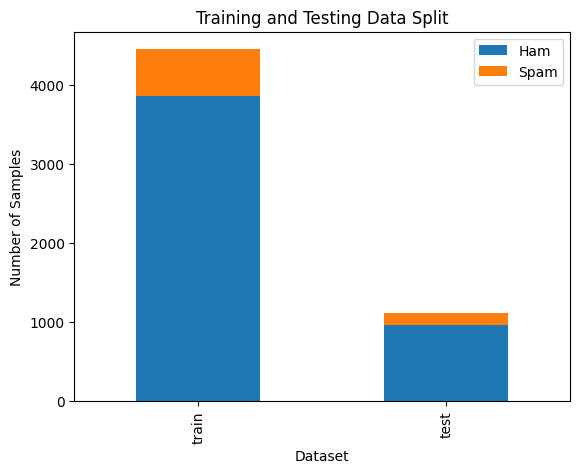

In [144]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

# Visualize the split between training and testing data
train_counts = y_train.value_counts()
test_counts = y_test.value_counts()
counts_df = pd.DataFrame({'train': train_counts, 'test': test_counts}).transpose()

plt.figure(figsize=(10, 5))
counts_df.plot(kind='bar', stacked=True)
plt.title('Training and Testing Data Split')
plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.legend(['Ham', 'Spam'])
plt.show()

In [ ]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

4. Train Models

Naive Bayes



In [135]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
y_pred_nb = nb.predict(X_test_tfidf)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f'Naive Bayes Accuracy: {accuracy_nb}')


Naive Bayes Accuracy: 0.9757847533632287


Logistic Regression

In [136]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {accuracy_lr}')


Logistic Regression Accuracy: 0.9605381165919282


Support Vector Machine (SVM)

In [137]:
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {accuracy_svm}')


SVM Accuracy: 0.9847533632286996


Random Forest

In [138]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)
y_pred_rf = rf.predict(X_test_tfidf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf}')


Random Forest Accuracy: 0.9757847533632287


5. Evaluatation and Results

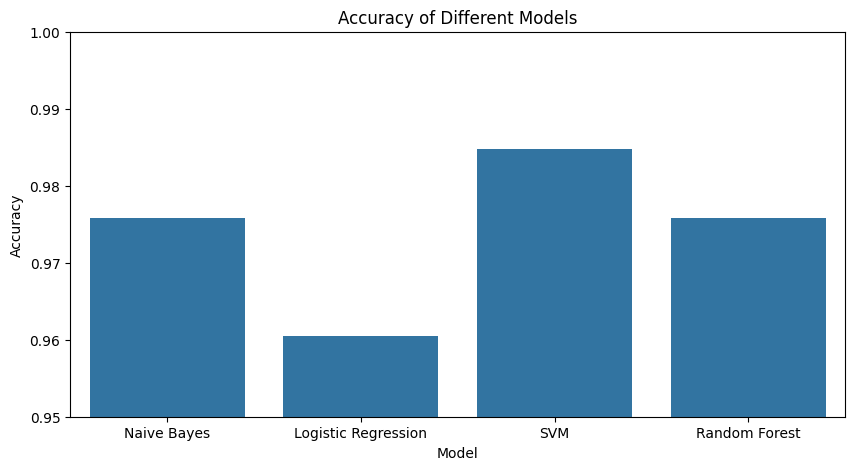

In [139]:
# Compare results
models = ['Naive Bayes', 'Logistic Regression', 'SVM', 'Random Forest']
accuracies = [accuracy_nb, accuracy_lr, accuracy_svm, accuracy_rf]

plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.ylim(0.95, 1.0)
plt.title('Accuracy of Different Models')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

6. Evaluation Metrics

In [140]:
print('Naive Bayes Classification Report')
print(classification_report(y_test, y_pred_nb))

print('Logistic Regression Classification Report')
print(classification_report(y_test, y_pred_lr))

print('SVM Classification Report')
print(classification_report(y_test, y_pred_svm))

print('Random Forest Classification Report')
print(classification_report(y_test, y_pred_rf))


Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       959
           1       1.00      0.83      0.91       156

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.95      1115
weighted avg       0.98      0.98      0.97      1115

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       959
           1       0.97      0.74      0.84       156

    accuracy                           0.96      1115
   macro avg       0.97      0.87      0.91      1115
weighted avg       0.96      0.96      0.96      1115

SVM Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       959
           1       0.97      0.92      0.94       156

    accuracy                           0.98      1115
   macro avg       0.98   

7. Inputs

In [141]:
def classify_text(text):
    text_tfidf = vectorizer.transform([text])
    predictions = {
        'Naive Bayes': nb.predict(text_tfidf)[0],
        'Logistic Regression': lr.predict(text_tfidf)[0],
        'SVM': svm.predict(text_tfidf)[0],
        'Random Forest': rf.predict(text_tfidf)[0]
    }
    return predictions

# Input text
new_text = input("Enter a text to classify as ham or spam: ")

# Classify using all models
predictions = classify_text(new_text)

# Display the predictions with the corresponding accuracy
for model in predictions:
    label = 'spam' if predictions[model] == 1 else 'ham'
    print(f"{model} prediction: {label} ")


Enter a text to classify as ham or spam: get free internships worth 9 lakhs for free call us at 000-111-222
Naive Bayes prediction: spam 
Logistic Regression prediction: spam 
SVM prediction: spam 
Random Forest prediction: ham 
